In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

In [121]:
df = pd.read_csv('AB_NYC_2019.csv',index_col=None)

In [134]:
df.head()

,id,name,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,9
1,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,45
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,0
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,270
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,9


In [123]:
df.drop(['host_id','host_name','latitude','longitude','minimum_nights','last_review','reviews_per_month','calculated_host_listings_count','availability_365'],axis=1,inplace=True)

In [124]:
print('Features : ',df.shape[1])
print('Data : ',df.shape[0])

Features :  7
Data :  48895


let's reduce this data to 2000 only.

In [125]:
df = df[:2000]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2000 non-null   int64 
 1   name                 2000 non-null   object
 2   neighbourhood_group  2000 non-null   object
 3   neighbourhood        2000 non-null   object
 4   room_type            2000 non-null   object
 5   price                2000 non-null   int64 
 6   number_of_reviews    2000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


In [127]:
df.isnull().sum()

id                     0
name                   0
neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
number_of_reviews      0
dtype: int64

In [128]:
top_5_locations = df.groupby('neighbourhood_group')['id'].count().to_frame()

In [129]:
top_5_locations.sort_values('id',0).head()

,id
neighbourhood_group,
Staten Island,21
Bronx,24
Queens,117
Brooklyn,910
Manhattan,928


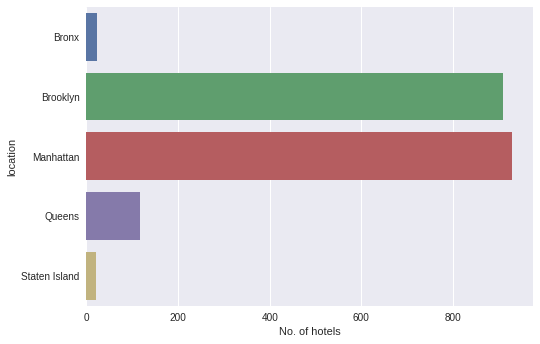

In [130]:
sns.barplot(y=top_5_locations.index,x=top_5_locations.id)
plt.xlabel('No. of hotels')
plt.ylabel('location')
plt.show()

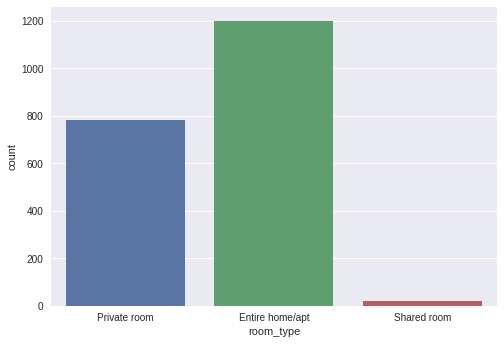

In [131]:
sns.countplot(df['room_type'])

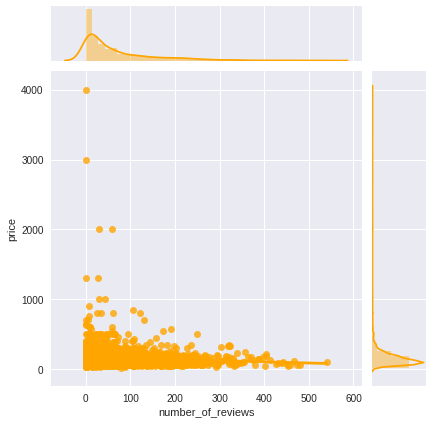

In [139]:
sns.jointplot(df.number_of_reviews,df.price,kind='reg',color='orange')

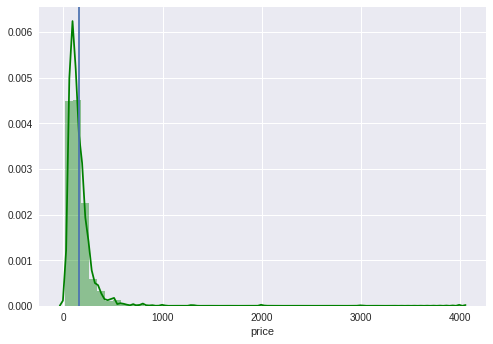

In [132]:
sns.distplot(df.price,color='green')
plt.axvline(df.price.mean())

In [143]:
df.sort_values('number_of_reviews',ascending=False)[['name','number_of_reviews']].head().style.background_gradient(cmap='Blues')

,name,number_of_reviews
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,540
471,LG Private Room/Family Friendly,480
1271,My Little Guest Room in Flushing,474
113,Park Slope Green Guest House,467
225,PRIVATE Room on Historic Sugar Hill,458
